# 用pandas預測你的人生財務曲線

In [1]:
起始資金 = 60
每月薪水 = 6.5
每月開銷 = 1 # 不含房租
每月房租 = 3
退休年齡 = 65
預測時段 = range(25, 90, 1)

### 每年淨額 計算
每年淨額就是每年銀行帳戶的變化值，也就是當年的**總收入** - **總支出**
* 收入的部分有：薪水
* 支出的部分有：開銷、房租

同時必須考慮起始資金跟退休年齡！



<AxesSubplot:>

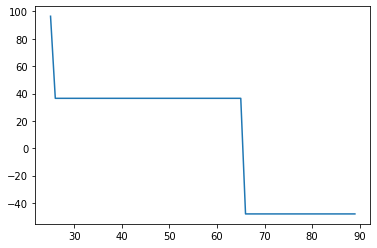

In [2]:
import pandas as pd

# 每年淨額
每年淨額 = pd.Series(0, index=預測時段)
每年淨額.iloc[0] = 起始資金
每年淨額.loc[:退休年齡] += 每月薪水 * 13
每年淨額 -= (每月開銷 + 每月房租) * 12

%matplotlib inline
每年淨額.plot()

### 沒有投資的總資產變化情況

<AxesSubplot:>

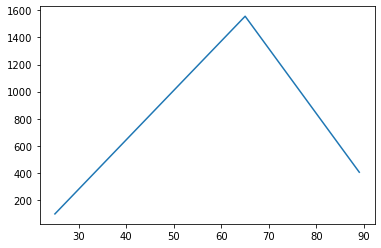

In [3]:
# 無投資總資產

無投資總資產 = 每年淨額.cumsum()
無投資總資產.plot()

### 有投資的總資產變化情況

每年，我們都審視前年的帳戶，將資金分成兩份
* 投資金額 = 總帳戶金額 * 投資部位
* 存在帳戶裡不動錢 = 總帳戶金額 * (1 - 投資部位)

所以今年底的帳戶餘額 = 投資金額 * 投資年利率 + 存在帳戶裡不動的錢 + 今年淨額

於是我們可以寫一個函式代表每年的資產增加變化：

<AxesSubplot:>

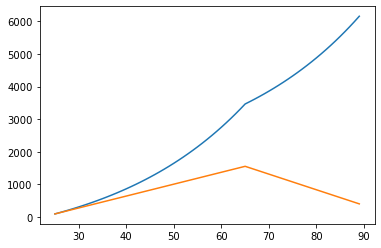

In [4]:
投資部位 = 0.7
投資年利率 = 5 # 跟影片中不太一樣，影片中：1.05，改成 5% 來表示，比較好理解，也就是一年有5％的報酬率

def compound_interest(arr, ratio, return_rate):
    ret = [arr.iloc[0]]
    for v in arr[1:]:
        ret.append(ret[-1] * ratio * (return_rate/100+1) + ret[-1] * (1 - ratio) + v)
    return pd.Series(ret, 預測時段)

投資總資產 = compound_interest(每年淨額, 投資部位, 投資年利率)
投資總資產.plot()
無投資總資產.plot()

# 考慮買房的話
* 假設買房總共要花「買房價格」
* 然後一開始，我們會付「買房頭期款」
* 在到達「買房年紀」以前，先租房；從「買房年紀」以後，就是負貸款
* 設定「貸款年數」，設定究竟想要貸款幾年
* 貸款就得付「房貸利率」（％）！

In [5]:
買房價格 = 2000
買房頭期款 = 500
買房年紀 = 35
房貸利率 = 1.4
貸款年數 = 20

# 先計算每年的買房花費

<AxesSubplot:>

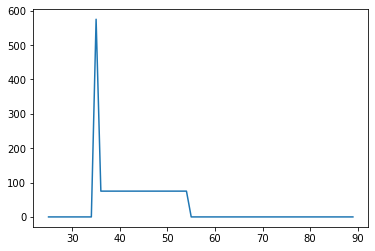

In [6]:
買房花費 = pd.Series(0, index=預測時段)
買房花費[買房年紀] = 買房頭期款
買房花費.loc[買房年紀:買房年紀+貸款年數-1] += (買房價格 - 買房頭期款) / 貸款年數
買房花費.plot()

# 接下來計算貸款的利息

<AxesSubplot:>

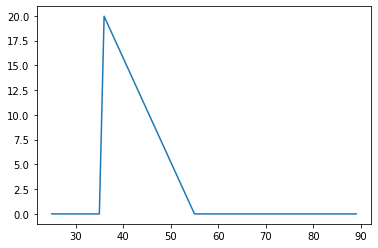

In [7]:
# 先計算有多少欠款
欠款 = pd.Series(0, index=預測時段)
欠款[買房年紀] = 買房價格
欠款 = 欠款.cumsum()
欠款 = 欠款 - 買房花費.cumsum()
#欠款.plot()
#
利息 = 欠款.shift().fillna(0) * 房貸利率 / 100
利息.plot()

# 計算繳房租

<AxesSubplot:>

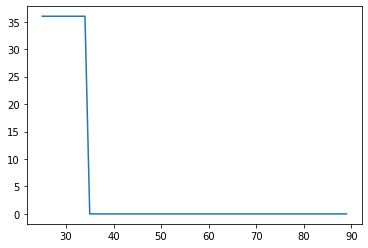

In [8]:
房租年繳 = pd.Series(每月房租*12, index=預測時段)
房租年繳.loc[買房年紀:] = 0
房租年繳.plot()

<AxesSubplot:>

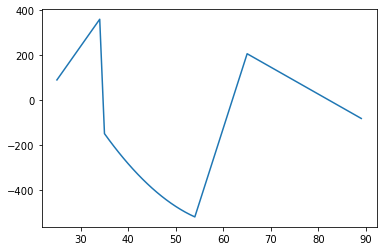

In [9]:
每年淨額_買房 = pd.Series(0, index=預測時段)
每年淨額_買房.iloc[0] = 起始資金
每年淨額_買房.loc[:退休年齡] += 每月薪水 * 12
每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)
每年淨額_買房.cumsum().plot()
#每年淨額_買房.plot()

<AxesSubplot:>

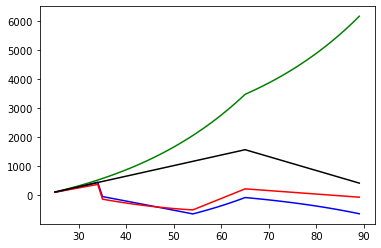

In [10]:
投資_買房_總資產 = compound_interest(每年淨額_買房, 投資部位, 投資年利率)
#
投資總資產.plot(color='green')
投資_買房_總資產.plot(color='blue')
每年淨額_買房.cumsum().plot(color='red')
無投資總資產.plot(color='black')

In [11]:
import pandas as pd
import random
%matplotlib inline
def asset_prediction(起始資金 ,起始年紀,
    每月薪水 ,
    每月開銷 ,
    每月房租 ,
    退休年齡 ,
    投資部位,
    投資年利率,
    買房價格,
    買房頭期款,
    買房年紀,
    房貸利率,
    貸款年數,):

    預測時段 = range(起始年紀, 100)
    每年淨額 = pd.Series(0, index=預測時段)
    每年淨額.iloc[0] = 起始資金
    每年淨額.loc[:退休年齡] += 每月薪水 * 12
    每年淨額 -= (每月開銷 + 每月房租) * 12
    
    
    def compound_interest(arr, ratio, return_rate):
        ret = [arr.iloc[0]]
        for v in arr[1:]:
            ret.append(ret[-1] * ratio * (return_rate/100 + 1) + ret[-1] * (1 - ratio) + v)
        return pd.Series(ret, 預測時段)
    
    買房花費 = pd.Series(0, index=預測時段)
    買房花費[買房年紀] = 買房頭期款
    買房花費.loc[買房年紀:買房年紀+貸款年數-1] += (買房價格 - 買房頭期款) / 貸款年數
    
    欠款 = pd.Series(0, index=預測時段)
    欠款[買房年紀] = 買房價格
    欠款 = 欠款.cumsum()
    欠款 = 欠款 - 買房花費.cumsum()
    利息 = 欠款.shift().fillna(0) * 房貸利率 / 100


    房租年繳 = pd.Series(每月房租*12, index=預測時段)
    房租年繳.loc[買房年紀:] = 0
    
    每年淨額_買房 = pd.Series(0, index=預測時段)
    每年淨額_買房.iloc[0] = 起始資金
    每年淨額_買房.loc[:退休年齡] += 每月薪水 * 12
    每年淨額_買房 -= (每月開銷*12 + 房租年繳 + 利息 + 買房花費)
    
    
    
    pd.DataFrame({
        'no invest, no house': 每年淨額.cumsum(),
        'invest, no house': compound_interest(每年淨額, 投資部位, 投資年利率),
        'no invest, house': 每年淨額_買房.cumsum(),
        'invest, house': compound_interest(每年淨額_買房, 投資部位, 投資年利率),
        
    }).plot()

    
    import matplotlib.pylab as plt
    plt.ylim(0, None)
    
    print('月繳房貸', (買房價格 - 買房頭期款) / 貸款年數 / 12)
    print('利息', 利息.sum() / 貸款年數)
    print('')

import ipywidgets as widgets
widgets.interact(asset_prediction, 
    起始資金=widgets.FloatSlider(min=0, max=100, step=10, value=20),
    起始年紀=widgets.IntSlider(min=0, max=100, step=1, value=30),
    每月薪水=widgets.FloatSlider(min=0, max=20, step=0.1, value=3),
    每月開銷=widgets.FloatSlider(min=0, max=20, step=0.2, value=1),
    每月房租=widgets.FloatSlider(min=0, max=20, step=0.5, value=1),
    退休年齡=widgets.IntSlider(min=0, max=100, step=1, value=60),
    投資部位=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.7),
    投資年利率=widgets.FloatSlider(min=0, max=20, step=0.5, value=5),
    買房價格=widgets.IntSlider(min=100, max=2000, step=50, value=300),
    買房頭期款=widgets.IntSlider(min=100, max=2000, step=50, value=100),
    買房年紀=widgets.IntSlider(min=20, max=100, step=1, value=40),
    房貸利率=widgets.FloatSlider(min=1, max=5, step=0.1, value=2.4),
    貸款年數=widgets.IntSlider(min=0, max=40, step=1, value=20)
)

interactive(children=(FloatSlider(value=20.0, description='起始資金', step=10.0), IntSlider(value=30, description=…

<function __main__.asset_prediction(起始資金, 起始年紀, 每月薪水, 每月開銷, 每月房租, 退休年齡, 投資部位, 投資年利率, 買房價格, 買房頭期款, 買房年紀, 房貸利率, 貸款年數)>

### 結論

1. 絕對要開始投資，讓資產報酬率在每年5％就差很多了！
2. 買不買房差很大！
3. 投資部位很重要